In [8]:
def classify(train_model = 'XGBoost',percentage = 0.3,epoche = 10):
    import pandas as pd
    import numpy as np
    from sklearn.metrics import precision_score, recall_score, f1_score ,accuracy_score
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.over_sampling import RandomOverSampler
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.preprocessing import StandardScaler
    from tensorflow.keras import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    from tensorflow.keras.optimizers import Adam
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier 
    from xgboost import XGBClassifier
    

    data = pd.read_csv('creditcard.csv')

    # fraud_count = data['Class'].sum()
    # non_fraud_count = len(data) - fraud_count
    # print("Number of fraud transactions:", fraud_count)
    # print("Number of non-fraud transactions:", non_fraud_count)

    X = data.drop('Class', axis=1)
    y = data['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # smote = RandomOverSampler(sampling_strategy=0.4, random_state=42)
    smote = SMOTE(sampling_strategy=percentage,random_state=42)
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

    under_sampler = RandomUnderSampler(sampling_strategy=1,random_state=42)
    X_train_undersampled, y_train_undersampled = under_sampler.fit_resample(X_train_oversampled, y_train_oversampled)

    #normalization
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_undersampled = scaler.fit_transform(X_train_undersampled)
    X_test = scaler.transform(X_test)
    # Train the model deep neural network
    if train_model == 'dnn':
        # Convert the data to numpy arrays
        y_train_undersampled = np.array(y_train_undersampled).reshape(-1, 1)
        y_test = np.array(y_test).reshape(-1, 1)
        classifier = Sequential()
        classifier.add(Dense(32, activation='relu'))
        classifier.add(Dense(16, activation='relu'))
        classifier.add(Dense(8, activation='relu'))
        classifier.add(Dense(1, activation='sigmoid'))
        classifier.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        classifier.fit(X_train_undersampled, y_train_undersampled, epochs=epoche, validation_split=0.2, callbacks=[early_stopping])


    elif train_model == 'svm':
        classifier = SVC(kernel='poly',C=0.1,gamma=1,random_state=42)
        classifier.fit(X_train_undersampled,y_train_undersampled) 
        
        
    elif train_model == 'rf':
        classifier = RandomForestClassifier(random_state=42)
        classifier.fit(X_train_undersampled,y_train_undersampled)
    elif train_model == 'lr':
        classifier = LogisticRegression(random_state=42)
        classifier.fit(X_train_undersampled,y_train_undersampled)
    elif train_model == 'XGBoost':
        classifier = XGBClassifier(random_state=42)
        classifier.fit(X_train_undersampled,y_train_undersampled)
    elif train_model == 'knn':
        classifier = KNeighborsClassifier()
        classifier.fit(X_train_undersampled,y_train_undersampled)
    elif train_model == 'dt':
        classifier = DecisionTreeClassifier(random_state=42)
        classifier.fit(X_train_undersampled,y_train_undersampled)



    y_pred = classifier.predict(X_test)
    if train_model == 'dnn':
        y_pred = (y_pred >= 0.5).astype(int)
        

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Classification Results:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

In [13]:
data = pd.read_csv('creditcard.csv')

fraud_count = data['Class'].sum()
non_fraud_count = len(data) - fraud_count
print("Number of fraud transactions:", fraud_count)
print("Number of non-fraud transactions:", non_fraud_count)

Number of fraud transactions: 492
Number of non-fraud transactions: 284315


In [14]:
classify(train_model = 'svm',percentage = 1)

Classification Results:
Accuracy: 0.9983673326077034
Precision: 0.5165562913907285
Recall: 0.7959183673469388
F1-score: 0.6265060240963854


In [17]:
classify(train_model = 'lr',percentage = 1)

Classification Results:
Accuracy: 0.9914504406446403
Precision: 0.15817223198594024
Recall: 0.9183673469387755
F1-score: 0.2698650674662668


c:\Users\COMPUTER SHAHR\anaconda3\envs\quera1\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
classify(train_model = 'dnn',percentage = 0.8,epoche=15)

Epoch 1/15


c:\Users\COMPUTER SHAHR\anaconda3\envs\quera1\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


9098/9098 [==============================] - 14s 1ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0143 - val_accuracy: 0.9959
Epoch 2/15
9098/9098 [==============================] - 14s 2ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0101 - val_accuracy: 0.9981
Epoch 3/15
9098/9098 [==============================] - 14s 2ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 4/15
9098/9098 [==============================] - 14s 2ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 0.0085 - val_accuracy: 0.9972
Epoch 5/15
9098/9098 [==============================] - 14s 2ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.0021 - val_accuracy: 0.9999
Epoch 6/15
9098/9098 [==============================] - 15s 2ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0042 - val_accuracy: 0.9989
Epoch 7/15
9098/9098 [==============================] - 15s 2ms/step - loss: 0.0071 - accuracy: 0.9983 - val_loss: 0.0114 - val_accuracy: 0.9

In [27]:
classify(train_model = 'rf',percentage = 1)

Classification Results:
Accuracy: 0.9995435553526912
Precision: 0.875
Recall: 0.8571428571428571
F1-score: 0.8659793814432989


In [28]:
classify(train_model = 'XGBoost',percentage = 1)

Classification Results:
Accuracy: 0.999420666409185
Precision: 0.8155339805825242
Recall: 0.8571428571428571
F1-score: 0.835820895522388


In [9]:
classify(train_model = 'dt',percentage = 1)


Classification Results:
Accuracy: 0.9978582212703205
Precision: 0.4294117647058823
Recall: 0.7448979591836735
F1-score: 0.5447761194029851


In [10]:
classify(train_model = 'knn',percentage = 1)

Classification Results:
Accuracy: 0.9984375548611355
Precision: 0.5290322580645161
Recall: 0.8367346938775511
F1-score: 0.6482213438735178


c:\Users\COMPUTER SHAHR\anaconda3\envs\quera1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Percentage of fraudulent transactions in cluster 0: 0.002154567356345854 number of fraudulent in cluster 0: 330
Percentage of fraudulent transactions in cluster 1: 0.0012305915955151774 number of fraudulent in cluster 1: 162
Percentage of fraudulent transactions that are in cluster 0: 0.6707317073170732
Percentage of fraudulent transactions that are in cluster 1: 0.32926829268292684


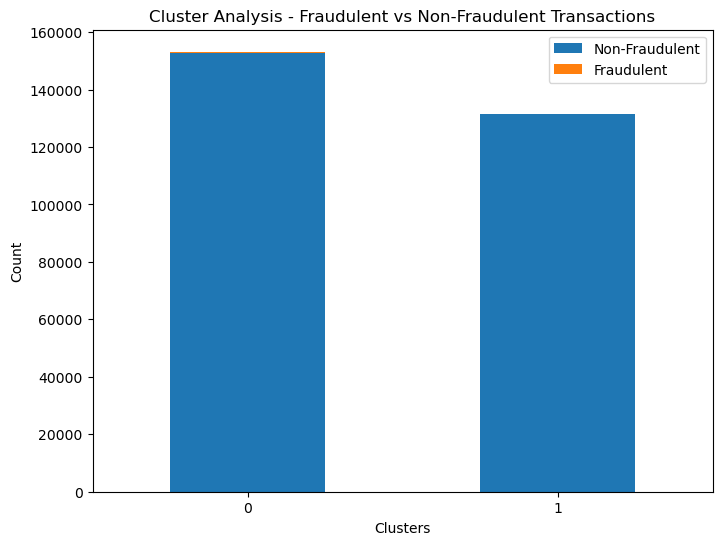

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Exclude the  'Class' columns from clustering analysis
X = data.drop(['Class'], axis=1)

# Perform clustering using K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# percentage of fraudulent in cluster 0 and number of fraudulent in cluster 0
print("Percentage of fraudulent transactions in cluster 0:", data.iloc[clusters == 0]['Class'].sum() / len(data.iloc[clusters == 0]), 'number of fraudulent in cluster 0:', data.iloc[clusters == 0]['Class'].sum())
# percentage of fraudulent in cluster 1 and number of fraudulent in cluster 1
print("Percentage of fraudulent transactions in cluster 1:", data.iloc[clusters == 1]['Class'].sum() / len(data.iloc[clusters == 1]), 'number of fraudulent in cluster 1:', data.iloc[clusters == 1]['Class'].sum())
# percentage of fraudulent that are in cluster 0 
fraud_count = data['Class'].sum()
print("Percentage of fraudulent transactions that are in cluster 0:", data.iloc[clusters == 0]['Class'].sum() / fraud_count)
# percentage of fraudulent that are in cluster 1
print("Percentage of fraudulent transactions that are in cluster 1:", data.iloc[clusters == 1]['Class'].sum() / fraud_count)

# Analyze the clusters
cluster_analysis = pd.DataFrame({'Clusters': clusters, 'Class': data['Class']})
cluster_counts = cluster_analysis.groupby(['Clusters', 'Class']).size().unstack()

# Plotting the cluster analysis
fig, ax = plt.subplots(figsize=(8, 6))
cluster_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_title('Cluster Analysis - Fraudulent vs Non-Fraudulent Transactions')
plt.xticks(rotation=0)
plt.legend(['Non-Fraudulent', 'Fraudulent'])
plt.show()